# Projeto 2 - Ciência dos dados

**Integrantes:**
</p>

- Amanda Carmo

</p>

- Vitor Miada

# <font color='#58878C'>Objetivo do projeto:</font>
<p>
Realizar análise de dados, voltada para variáveis de cunho qualitativo por meio de técnicas como: regressão linear, decision tree e random forest regression.
<p>
A análise será feita colocando em foco corridas de fórmula 1, de modo a prever as primeiras posições dos corredores


## Data-Set 

Foram encontradas várias bases de dados, importantes para o projeto contendo os dados de cada corrida. Cada um deles continha, separadamente, dados da escuderia, corredor, circuito, qualificação e os resultados.

Primeiramente, foi preparado o ambiente no jupyter, sob o qual se trataria os dados para a análise:

In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

In [29]:
dados_driver = pd.read_csv('drivers.csv')
dados_quali = pd.read_csv('quali.csv')
dados_result = pd.read_csv('results.csv')
dados_circuit = pd.read_csv('a.csv')
dados_race = pd.read_csv('b.csv')
dados_contresult = pd.read_csv('contresu.csv')
dados_escud = pd.read_csv('cont.csv')

____
### Limpando os dados

O primeiro passo a ser feito é o tratamento dos datasets com o objetivo de se ter uma leitura mais limpa, focando-se naquilo que será analisado.

- dados do corredor:

In [30]:
dados_driver = dados_driver.drop(dados_driver.columns[[3, 4, 5, 6, 8]], axis=1) 

In [31]:
dados_driver.head()

,driverId,driverRef,number,nationality
0,1,hamilton,44,British
1,2,heidfeld,\N,German
2,3,rosberg,6,German
3,4,alonso,14,Spanish
4,5,kovalainen,\N,Finnish


.

- dados da qualificação:

In [32]:
dados_quali = dados_quali.drop(dados_quali.columns[[6, 7, 8]], axis=1) 

In [33]:
dados_quali.head()

,qualifyId,raceId,driverId,constructorId,number,position
0,1,18,1,1,22,1
1,2,18,9,2,4,2
2,3,18,5,1,23,3
3,4,18,13,6,2,4
4,5,18,2,2,3,5


.

- dados da escuderia:

In [34]:
dados_escud = dados_escud.drop(dados_escud.columns[[1, 4]], axis=1) 

.

- dados da corrida:

In [35]:
dados_race = dados_race.drop(dados_race.columns[[2, 5, 6, 7]], axis=1) 

In [36]:
dados_race.head()

,raceId,year,circuitId,name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix


.

- dados do circuito:

In [37]:
dados_circuit = dados_circuit.drop(dados_circuit.columns[[1, 3, 5, 6, 7, 8]], axis=1) 

In [38]:
dados_circuit.head()

,circuitId,name,country
0,1,Albert Park Grand Prix Circuit,Australia
1,2,Sepang International Circuit,Malaysia
2,3,Bahrain International Circuit,Bahrain
3,4,Circuit de Barcelona-Catalunya,Spain
4,5,Istanbul Park,Turkey


.

- Resultados

Escuderia:

In [39]:
dados_contresult =  dados_contresult.drop(dados_contresult.columns[[5]], axis=1).sort_values(by=['raceId'])

In [40]:
dados_contresult.head()

,constructorStandingsId,raceId,constructorId,points,position,wins
3666,4046,1,6,0.0,9,0
3667,4044,1,2,0.0,7,0
3668,4045,1,9,0.0,8,0
3669,4043,1,10,0.0,6,0
3670,4042,1,5,3.0,5,0


Geral:

In [41]:
pontos = dados_contresult.drop(columns = ['constructorStandingsId', 'position', 'constructorId', 'wins'])

In [42]:
pontos.head()

,raceId,points
3666,1,0.0
3667,1,0.0
3668,1,0.0
3669,1,0.0
3670,1,3.0


In [43]:
dados_result =  dados_result.drop(dados_result.columns[[5, 7, 9, 10,11,12,13,15,16,17]], axis=1) 

In [44]:
dados_result.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
0,1,18,1,1,22,1,1,2
1,2,18,2,2,3,2,2,3
2,3,18,3,3,7,3,3,5
3,4,18,4,4,5,4,4,7
4,5,18,5,1,23,5,5,1


In [45]:
dados_results = dados_result.sort_values(by=['raceId'])

In [46]:
dados_results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
7572,7573,1,1,1,1,\N,20,13
7571,7572,1,5,1,2,\N,19,\N
7570,7571,1,6,3,17,\N,18,18
7569,7570,1,12,4,8,\N,17,19
7568,7569,1,13,6,3,\N,16,15


In [47]:
resultsi = dados_results.merge(dados_race, on = 'raceId', how = 'left')

In [48]:
resultsi.head(30).head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,year,circuitId,name
0,7573,1,1,1,1,\N,20,13,2009,1,Australian Grand Prix
1,7572,1,5,1,2,\N,19,\N,2009,1,Australian Grand Prix
2,7571,1,6,3,17,\N,18,18,2009,1,Australian Grand Prix
3,7570,1,12,4,8,\N,17,19,2009,1,Australian Grand Prix
4,7569,1,13,6,3,\N,16,15,2009,1,Australian Grand Prix


In [49]:
results = resultsi.drop(resultsi.columns[[8,10]], axis=1)

In [50]:
results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
0,7573,1,1,1,1,\N,20,13,1
1,7572,1,5,1,2,\N,19,\N,1
2,7571,1,6,3,17,\N,18,18,1
3,7570,1,12,4,8,\N,17,19,1
4,7569,1,13,6,3,\N,16,15,1


In [51]:
F_result = results.merge(pontos, on = 'raceId', how = 'left')

In [52]:
F_result.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId,points
0,7573,1,1,1,1,\N,20,13,1,0.0
1,7573,1,1,1,1,\N,20,13,1,0.0
2,7573,1,1,1,1,\N,20,13,1,0.0
3,7573,1,1,1,1,\N,20,13,1,0.0
4,7573,1,1,1,1,\N,20,13,1,3.0


___

#### De modo a deixar a base de dados mais limpa, serão consideradas as sete primeiras posições de chagada. Desta forma, trata-se o data frame principal, denominado **dados**:

In [59]:
dados = results[results['positionOrder'].map(int) < 8]

In [60]:
dados.head(3)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1


___

### ANALISE EXPLORATORIA


In [61]:
#taxa de vitoria da escuderia 
dados_taxa = pd.crosstab(dados_contresult['constructorId'],dados_contresult['position'], normalize = "index" )
dados_taxa.head()


position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.014286,0.342857,0.157143,0.000000,0.185714,0.114286,0.057143,0.128571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.152000,0.128000,0.134667,0.164000,0.086667,0.058667,0.058667,0.042667,0.061333,0.066667,...,0.001333,0.002667,0.001333,0.005333,0.010667,0.000000,0.0,0.0,0.0,0.0
4,0.118252,0.061697,0.120823,0.213368,0.167095,0.066838,0.077121,0.043702,0.051414,0.002571,...,0.010283,0.005141,0.017995,0.005141,0.017995,0.002571,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.003731,0.041045,0.164179,0.268657,0.205224,0.287313,0.029851,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [62]:
dados_taxa_filtrado = dados_taxa.sort_values(by=1).tail(11)
dados_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
9,0.220280,0.171329,0.269231,0.076923,0.055944,0.094406,0.073427,0.034965,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
180,0.222222,0.240741,0.111111,0.074074,0.111111,0.018519,0.018519,0.000000,0.000000,0.000000,...,0.018519,0.166667,0.018519,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
170,0.224719,0.044944,0.123596,0.213483,0.157303,0.011236,0.000000,0.033708,0.056180,0.000000,...,0.000000,0.011236,0.056180,0.0,0.05618,0.0,0.0,0.0,0.0,0.0
87,0.235294,0.058824,0.352941,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.058824,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [63]:
dados_taxa_filtrado1 = dados_taxa_filtrado.loc[:,[1]].head(11)

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

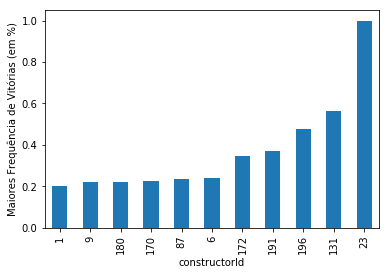

In [64]:
dados_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

In [65]:
#taxa de vitoria de cada corredor
dados_quali[["driverId", "position"]].head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


In [66]:
corredor_taxa = pd.crosstab(dados_quali['driverId'],dados_quali['position'], normalize = "index" )

In [67]:
corredor_taxa_filtrado = corredor_taxa.sort_values(by=1).tail(11)
corredor_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
driverId,,,,,,,,,,,,,,,,,,,,,
35,0.084337,0.036145,0.072289,0.036145,0.012048,0.036145,0.024096,0.048193,0.096386,0.060241,...,0.000000,0.0,0.012048,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
77,0.086957,0.043478,0.130435,0.217391,0.152174,0.043478,0.086957,0.065217,0.000000,0.021739,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
844,0.142857,0.047619,0.071429,0.119048,0.047619,0.000000,0.023810,0.071429,0.119048,0.023810,...,0.047619,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.145631,0.145631,0.048544,0.038835,0.067961,0.087379,0.097087,0.038835,0.067961,0.038835,...,0.004854,0.0,0.000000,0.0,0.004854,0.000000,0.0,0.0,0.0,0.0
57,0.161290,0.016129,0.129032,0.080645,0.080645,0.048387,0.112903,0.177419,0.096774,0.032258,...,0.000000,0.0,0.000000,0.0,0.000000,0.016129,0.0,0.0,0.0,0.0


In [68]:
corredor_taxa_filtrado1 = corredor_taxa_filtrado.loc[:,[1]].head(11)

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

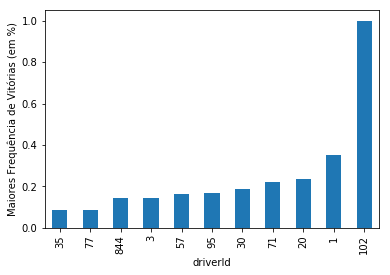

In [69]:
corredor_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

___

## Técnicas de análise: variáveis qualitativas

## Random forest

Esta técnica utilizada pelo grupo se baseia, como sugerido pelo seu nome, em um conjunto de árvores de decisões, assim, com várias ramificações, possibilidades. Cada uma dessas árvores trabalha de forma individual de modo a gerar uma possível predição. O resultado obtido no classificador será validado conforme a predição predominante entre as árvores.

A primeira coisa feita foi separar, com base no dataframe, chamado "dados", separá-lo a fim de se ter uma parte para o treino e uma para os testes.

In [70]:
dados.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1
14,7557,1,10,7,10,4,4,6,1
16,7559,1,3,3,16,6,6,1,1


In [71]:
msk = np.random.rand(len(dados)) < 0.8

In [72]:
train = dados[msk]

In [73]:
train.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1
14,7557,1,10,7,10,4,4,6,1
16,7559,1,3,3,16,6,6,1,1


In [74]:
test = dados[~msk]
test.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
19,7558,1,4,4,7,5,5,9,1
20,7574,2,18,23,22,1,1,1,2
31,7575,2,2,2,6,2,2,10,2
36,7580,2,1,1,1,7,7,11,2
50,7595,3,17,9,14,2,2,4,17


In [75]:
y_train = train['positionOrder']
x_train = train.drop(columns = ['positionOrder', 'position'])

In [76]:
y_test = test['positionOrder']
x_test = test.drop(columns=['positionOrder', 'position'])

In [77]:
y_test.dtype

dtype('int64')

In [78]:
y_train.dtype

dtype('int64')

In [79]:
#plt.scatter(x_test.points, y_test)

In [80]:
x_test.head()

,resultId,raceId,driverId,constructorId,number,rank,circuitId
19,7558,1,4,4,7,9,1
20,7574,2,18,23,22,1,2
31,7575,2,2,2,6,10,2
36,7580,2,1,1,1,11,2
50,7595,3,17,9,14,4,17


In [81]:
#x_train.points.corr(y_train)

In [82]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

O encoder usado acima possibilita conversão de variáveis categóricas em qualitativas. A partir disso, implementa-se o modelo Random Forest

In [83]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0,n_jobs = -1)
model.fit(x_train_encoded, y_train) #treina o modelo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [84]:
model.score(x_train_encoded,y_train) # taxa de acertos do treinamento (esperado dar 1)

1.0

#### realização dos testes:

A priori, testa-se a **acurácia** do modelo, depois, ele é **testado**

In [85]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [86]:
y_predict = model.predict(x_test_encoded)

In [87]:
acc_RandomForestClassifier= model.score(x_test_encoded, y_test)

In [88]:
acc_RandomForestClassifier

0.23664638269100743

## Matriz de Confusão

Com esta matriz podemos concluir os erros do nosso classificador. Pode-se perceber que o classificador está operando corretamente, pois mesmo com uma porcentagem "baixa", os valores próximos ao esperado estão mais altos que os não esperados.

In [89]:
matriz = confusion_matrix(y_test, y_predict)
matriz

array([[120,  40,  26,  14,  10,   2,   6],
       [ 73,  38,  45,  29,  14,  14,  20],
       [ 39,  29,  31,  24,  28,  19,  18],
       [ 24,  39,  37,  30,  31,  28,  21],
       [ 26,  15,  31,  25,  33,  34,  52],
       [ 10,  17,  21,  20,  25,  29,  80],
       [ 12,  11,  12,  19,  20,  69,  69]], dtype=int64)

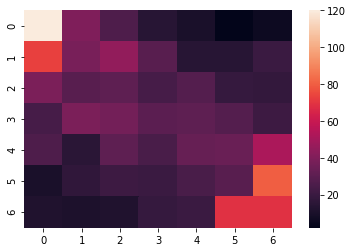

In [90]:
sns.heatmap(matriz)

Substituindo predições no dataset de teste:

In [91]:
test['PositionPredict'] = y_predict

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [93]:
y_predict_proba

array([[0.01, 0.04, 0.07, ..., 0.13, 0.19, 0.33],
       [0.31, 0.1 , 0.16, ..., 0.11, 0.11, 0.13],
       [0.  , 0.05, 0.09, ..., 0.19, 0.4 , 0.25],
       ...,
       [0.46, 0.32, 0.07, ..., 0.04, 0.02, 0.  ],
       [0.  , 0.01, 0.03, ..., 0.06, 0.25, 0.48],
       [0.12, 0.12, 0.58, ..., 0.04, 0.01, 0.  ]])

In [94]:
test['bPredictProba'] = y_predict_proba[:,1]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
resultados = test.sort_values(by='bPredictProba')[['driverId', 'constructorId', 'raceId', 'circuitId', 'positionOrder', 'PositionPredict']].head(20)


In [97]:
resultados.sort_values(by = 'PositionPredict').head()

,driverId,constructorId,raceId,circuitId,positionOrder,PositionPredict
19408,607,105,785,6,7,3
1430,18,11,68,17,4,4
9299,118,21,382,13,5,4
9339,118,21,383,14,4,4
9478,138,32,388,36,7,5


## Logistic Regression

In [98]:
msk2 = np.random.rand(len(dados)) < 0.8

In [99]:
train2 = dados[msk2]

In [100]:
test2 = dados[~msk2]

In [101]:
y_train2 = train2['positionOrder']
x_train2 = train2.drop(columns=['positionOrder', 'position','resultId'])

In [102]:
y_test2 = test2['positionOrder']
x_test2 = test2.drop(columns=['positionOrder', 'position','resultId'])

In [103]:
encoder2 = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder.fit_transform(x_train2.astype(str).values)

In [104]:
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [105]:
model2.fit(x_train2_encoded, y_train2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
x_test2_encoded = encoder.transform(x_test2.astype(str).values)

In [107]:
y_pred2 = model2.predict(x_test2_encoded)

In [108]:
acc = accuracy_score(y_test2, y_pred2)

In [109]:
acc

0.1028295376121463

In [110]:
matriz2 = confusion_matrix(y_test2, y_pred2)
matriz2

array([[70, 68, 30, 15, 12,  6,  2],
       [76, 11, 31, 23, 35, 10, 11],
       [30, 57,  6, 34, 25, 28, 22],
       [25, 32, 47,  5, 33, 38, 37],
       [30, 26, 37, 25,  8, 38, 48],
       [16, 10, 28, 29, 41, 10, 89],
       [13, 11,  9, 15, 36, 72, 39]], dtype=int64)

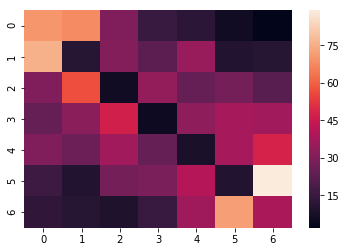

In [111]:
sns.heatmap(matriz2)

## Decision Tree


In [112]:
msk3 = np.random.rand(len(dados)) < 0.8

In [113]:
train3 = dados[msk3]

In [114]:
test3 = dados[~msk3]

In [115]:
y_train3 = train3['positionOrder']
x_train3 = train3.drop(columns=['positionOrder', 'position','resultId'])

In [116]:
encoder3 = OneHotEncoder(handle_unknown='ignore')
x_train3_encoded = encoder.fit_transform(x_train3.astype(str).values)

In [117]:
x_train_encoded

<5700x7364 sparse matrix of type '<class 'numpy.float64'>'
	with 39900 stored elements in Compressed Sparse Row format>

In [118]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train3_encoded, y_train3)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [119]:
y_test3 = test3['positionOrder']
x_test3 = test3.drop(columns=['positionOrder', 'position','resultId'])

In [120]:
x_test3_encoded = encoder.transform(x_test3.astype(str).values)

In [121]:
y_pred3 = regressor.predict(x_test3_encoded)

In [122]:
acc3 = accuracy_score(y_test3, y_pred3)

In [123]:
acc3

0.2389937106918239

In [124]:
matriz3 = confusion_matrix(y_test3, y_pred3)
matriz3

array([[101,  43,  37,  12,   6,   1,   9],
       [ 50,  52,  48,  17,  16,  15,  16],
       [ 23,  51,  34,  26,  23,  17,  21],
       [ 30,  26,  39,  19,  28,  19,  36],
       [ 25,  25,  41,  28,  33,  27,  32],
       [ 10,  16,  25,  23,  32,  42,  52],
       [  8,  14,  30,  17,  34,  41,  61]], dtype=int64)

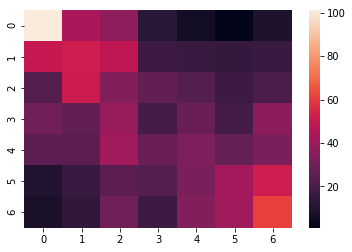

In [125]:
sns.heatmap(matriz3)